In [39]:
import sys

sys.path.append('/home/kalkiek/projects/reddit-political-affiliation/')
from src.features.interactions.political_comment import PoliticalComment
import json

from sklearn.metrics import classification_report,auc,roc_curve,precision_recall_curve,plot_precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
saved_path='user_prediction/evaluating_on_'
flair_eval_all=pd.read_csv(saved_path+'flair_6.tsv',sep='\t').drop(columns=['Unnamed: 0'])
gold_eval_all=pd.read_csv(saved_path+"gold_6.tsv",sep='\t').drop(columns=['Unnamed: 0'])
silver_eval_all=pd.read_csv(saved_path+"silver_6.tsv",sep='\t').drop(columns=['Unnamed: 0'])

In [41]:
def reset_score(score,politics):
    return (2*score-1)*politics+1-score

In [42]:
flair_eval_all['predict_score_flair']=flair_eval_all.apply(lambda x: reset_score(x.predict_score_flair, x.predict_politics_flair), axis=1)
flair_eval_all['predict_score_gold']=flair_eval_all.apply(lambda x: reset_score(x.predict_score_gold, x.predict_politics_gold), axis=1)
flair_eval_all['predict_score_silver']=flair_eval_all.apply(lambda x: reset_score(x.predict_score_silver, x.predict_politics_silver), axis=1)

gold_eval_all['predict_score_flair']=gold_eval_all.apply(lambda x: reset_score(x.predict_score_flair, x.predict_politics_flair), axis=1)
gold_eval_all['predict_score_gold']=gold_eval_all.apply(lambda x: reset_score(x.predict_score_gold, x.predict_politics_gold), axis=1)
gold_eval_all['predict_score_silver']=gold_eval_all.apply(lambda x: reset_score(x.predict_score_silver, x.predict_politics_silver), axis=1)

silver_eval_all['predict_score_flair']=silver_eval_all.apply(lambda x: reset_score(x.predict_score_flair, x.predict_politics_flair), axis=1)
silver_eval_all['predict_score_gold']=silver_eval_all.apply(lambda x: reset_score(x.predict_score_gold, x.predict_politics_gold), axis=1)
silver_eval_all['predict_score_silver']=silver_eval_all.apply(lambda x: reset_score(x.predict_score_silver, x.predict_politics_silver), axis=1)

In [44]:
silver_eval_all.head()

,username,predict_score_flair,predict_politics_flair,predict_score_gold,predict_politics_gold,predict_score_silver,predict_politics_silver,real_politics
0,--------_-------,0.837797,1,0.914665,1,0.825370,1,1
1,--444--,0.239820,0,0.674700,1,0.151296,0,0
2,--orb,0.017630,0,0.101907,0,0.559690,1,1
3,-AragornElessar-,0.121633,0,0.759026,1,0.287098,0,0
4,-Dee-Dee-,0.876433,1,0.915573,1,0.486955,0,1


In [45]:
fpr, tpr, thresholds = roc_curve(flair_eval_all['real_politics'],flair_eval_all['predict_score_flair'])
print("flair predict on flair:",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(flair_eval_all['real_politics'],flair_eval_all['predict_score_gold'])
print("gold predict on flair:",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(flair_eval_all['real_politics'],flair_eval_all['predict_score_silver'])
print("silver predict on flair:",auc(fpr, tpr))

flair predict on flair: 0.6868723999697451
gold predict on flair: 0.5162680583919521
silver predict on flair: 0.5156811133802284


In [46]:
fpr, tpr, thresholds = roc_curve(gold_eval_all['real_politics'],gold_eval_all['predict_score_flair'])
print("flair predict on gold:",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(gold_eval_all['real_politics'],gold_eval_all['predict_score_gold'])
print("gold predict on gold:",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(gold_eval_all['real_politics'],gold_eval_all['predict_score_silver'])
print("silver predict on gold:",auc(fpr, tpr))

flair predict on gold: 0.5916248774024406
gold predict on gold: 0.5236751801241064
silver predict on gold: 0.486304438031649


In [47]:
fpr, tpr, thresholds = roc_curve(silver_eval_all['real_politics'],silver_eval_all['predict_score_flair'])
print("flair predict on silver:",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(silver_eval_all['real_politics'],silver_eval_all['predict_score_gold'])
print("gold predict on silvdr:",auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(silver_eval_all['real_politics'],silver_eval_all['predict_score_silver'])
print("silver predict on silver:",auc(fpr, tpr))

flair predict on silver: 0.5407166106945549
gold predict on silvdr: 0.504368988510214
silver predict on silver: 0.5621193402594515


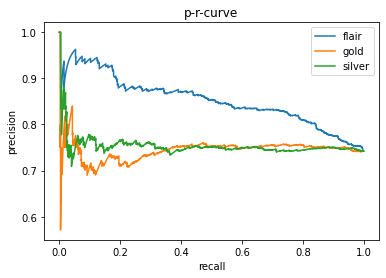

In [87]:
precision_f, recall_f, thresholds_f = precision_recall_curve(flair_eval_all['real_politics'],flair_eval_all['predict_score_flair'])
precision_g, recall_g, thresholds_g = precision_recall_curve(flair_eval_all['real_politics'],flair_eval_all['predict_score_gold'])
precision_s, recall_s, thresholds_s = precision_recall_curve(flair_eval_all['real_politics'],flair_eval_all['predict_score_silver'])
plt.plot(recall_f, precision_f,label='flair')
plt.plot(recall_g, precision_g,label='gold')
plt.plot(recall_s, precision_s,label='silver')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('p-r-curve')
plt.legend()
plt.show()

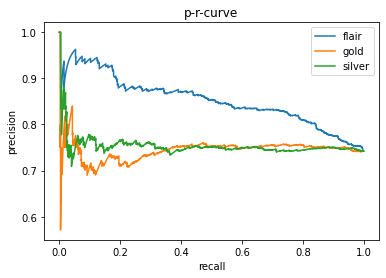

In [85]:
precision_f, recall_f, thresholds_f = precision_recall_curve(gold_eval_all['real_politics'],gold_eval_all['predict_score_flair'])
precision_g, recall_g, thresholds_g = precision_recall_curve(gold_eval_all['real_politics'],gold_eval_all['predict_score_gold'])
precision_s, recall_s, thresholds_s = precision_recall_curve(gold_eval_all['real_politics'],gold_eval_all['predict_score_silver'])
plt.plot(recall_f, precision_f,label='flair')
plt.plot(recall_g, precision_g,label='gold')
plt.plot(recall_s, precision_s,label='silver')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('p-r-curve')
plt.legend()
plt.show()

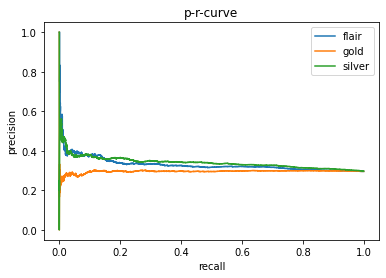

In [88]:
precision_f, recall_f, thresholds_f = precision_recall_curve(silver_eval_all['real_politics'],silver_eval_all['predict_score_flair'])
precision_g, recall_g, thresholds_g = precision_recall_curve(silver_eval_all['real_politics'],silver_eval_all['predict_score_gold'])
precision_s, recall_s, thresholds_s = precision_recall_curve(silver_eval_all['real_politics'],silver_eval_all['predict_score_silver'])
plt.plot(recall_f, precision_f,label='flair')
plt.plot(recall_g, precision_g,label='gold')
plt.plot(recall_s, precision_s,label='silver')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('p-r-curve')
plt.legend()
plt.show()